# SVM и его ядра
__Суммарное количество баллов: 10__

In [95]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib
import sklearn.svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import RandomForestClassifier

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [80]:
df = pd.read_csv('hw7_data/blobs2.csv')
y = df.label
X = df.drop(columns=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

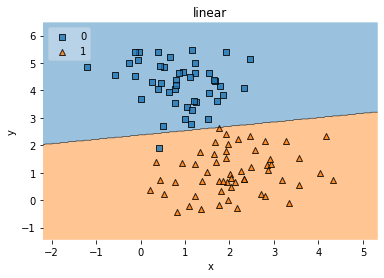

f1: 0.9909909909909909


In [81]:
classifier = sklearn.svm.SVC(C = 1, kernel ='linear')
classifier.fit(X_train, y_train)
plot_decision_regions(np.array(X_test), np.array(y_test), clf=classifier, legend=2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('linear')
plt.show()

y_pred = classifier.predict(X_test)
accuracy_score_temp = f1_score(y_test, y_pred)
print(f'f1:', accuracy_score_temp)

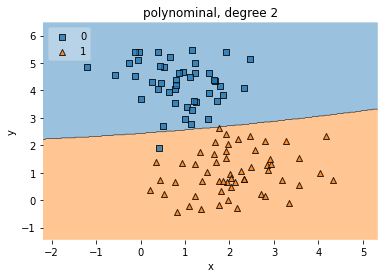

f1: 0.9909909909909909


In [82]:
classifier = sklearn.svm.SVC(C = 1, kernel ='poly', degree = 2)
classifier.fit(X_train, y_train)
plot_decision_regions(np.array(X_test), np.array(y_test), clf=classifier, legend=2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('polynominal, degree 2')
plt.show()

y_pred = classifier.predict(X_test)
accuracy_score_temp = f1_score(y_test, y_pred)
print(f'f1:', accuracy_score_temp)

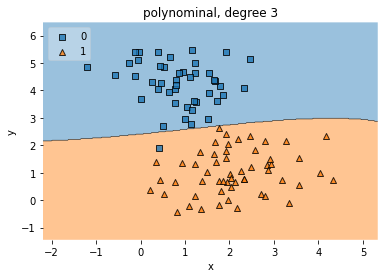

f1: 0.9909909909909909


In [83]:
classifier = sklearn.svm.SVC(C = 1, kernel ='poly', degree = 3)
classifier.fit(X_train, y_train)
plot_decision_regions(np.array(X_test), np.array(y_test), clf=classifier, legend=2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('polynominal, degree 3')
plt.show()

y_pred = classifier.predict(X_test)
accuracy_score_temp = f1_score(y_test, y_pred)
print(f'f1:', accuracy_score_temp)

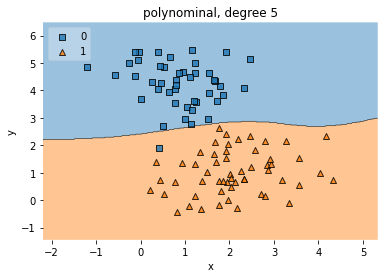

f1: 0.9909909909909909


In [84]:
classifier = sklearn.svm.SVC(C = 1, kernel ='poly', degree = 5)
classifier.fit(X_train, y_train)
plot_decision_regions(np.array(X_test), np.array(y_test), clf=classifier, legend=2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('polynominal, degree 5')
plt.show()

y_pred = classifier.predict(X_test)
accuracy_score_temp = f1_score(y_test, y_pred)
print(f'f1:', accuracy_score_temp)

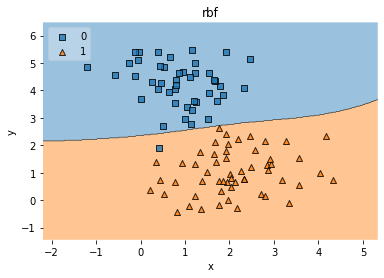

f1: 0.9909909909909909


In [85]:
classifier = sklearn.svm.SVC(C = 1, kernel ='rbf')
classifier.fit(X_train, y_train)
plot_decision_regions(np.array(X_test), np.array(y_test), clf=classifier, legend=2)


plt.xlabel('x')
plt.ylabel('y')
plt.title('rbf')
plt.show()

y_pred = classifier.predict(X_test)
accuracy_score_temp = f1_score(y_test, y_pred)
print(f'f1:', accuracy_score_temp)

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [86]:
CANCER_DATA_PATH = 'hw7_data/cancer.csv'
SPAM_DATA_PATH = 'hw7_data/spam.csv'
def read_cancer_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    y = df.label
    X = df.drop(columns=['label'])
    y = y.replace({'M': 1, 'B': 0})
    X = X.rename(columns={x:str(y + 1) for x,y in zip(X.columns,range(len(X.columns)))})
    return X, y

def read_spam_dataset(path_to_csv):
    df = pd.read_csv(path_to_csv)
    y = df.label
    X = df.drop(columns=['label'])
    X = X.rename(columns={x:str(y + 1) for x,y in zip(X.columns,range(len(X.columns)))})
    return X, y

X_cancer, y_cancer = read_cancer_dataset(CANCER_DATA_PATH)
X_spam, y_spam = read_spam_dataset(SPAM_DATA_PATH)

#### Cancer

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2)

##### SVM

In [116]:
classifier = sklearn.svm.SVC(C = 1, kernel ='rbf' , tol = 1e-8)
%time classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(f'f-1 score: {f1_score(y_test, y_pred)}')
print(f'AUC score: {roc_auc_score(y_pred, y_test)}')
print(f'Accuracy score: {accuracy_score(y_pred, y_test)}')

CPU times: user 7.55 ms, sys: 1.09 ms, total: 8.64 ms
Wall time: 7.7 ms
f-1 score: 0.8192771084337349
AUC score: 0.8971066907775769
Accuracy score: 0.868421052631579


##### Random Forest

In [117]:
classifier = RandomForestClassifier()
%time classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score_temp = f1_score(y_test, y_pred)
y_pred = classifier.predict(X_test)
print(f'f-1 score: {f1_score(y_test, y_pred)}')
print(f'AUC score: {roc_auc_score(y_pred, y_test)}')
print(f'Accuracy score: {accuracy_score(y_pred, y_test)}')

CPU times: user 199 ms, sys: 3.31 ms, total: 202 ms
Wall time: 203 ms
f-1 score: 0.924731182795699
AUC score: 0.9415458937198069
Accuracy score: 0.9385964912280702


#### Spam

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_spam, y_spam, test_size=0.2)

##### SVM

In [119]:
classifier = sklearn.svm.SVC(C = 1, kernel ='rbf' , tol = 1e-8)
%time classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(f'f-1 score: {f1_score(y_test, y_pred)}')
print(f'AUC score: {roc_auc_score(y_pred, y_test)}')
print(f'Accuracy score: {accuracy_score(y_pred, y_test)}')

CPU times: user 724 ms, sys: 5.7 ms, total: 730 ms
Wall time: 729 ms
f-1 score: 0.5572139303482587
AUC score: 0.7106767289372757
Accuracy score: 0.7100977198697068


##### Random Forest

In [120]:
classifier = RandomForestClassifier()
%time classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score_temp = f1_score(y_test, y_pred)
y_pred = classifier.predict(X_test)
print(f'f-1 score: {f1_score(y_test, y_pred)}')
print(f'AUC score: {roc_auc_score(y_pred, y_test)}')
print(f'Accuracy score: {accuracy_score(y_pred, y_test)}')

CPU times: user 529 ms, sys: 6.04 ms, total: 535 ms
Wall time: 535 ms
f-1 score: 0.9455040871934605
AUC score: 0.9547015020804849
Accuracy score: 0.9565689467969598


Из приведенных выше рассуждений видно, что случайные леса точнее решают задачу классификации, что особенно заметно на примере спам писем. Так как время построения случайного леса было меньше, чем время работы метода опорных векторов. 